In [2]:
import helper
import pathlib
import importlib
import ica_module
import numpy as np
import pandas as pd
from nilearn.image import load_img, index_img
from original_cohort import subject_df, Healthy_index, PD_index, Original_DBMs
from ica_module import ICA_decomposition, apply_masker, ICS_PATH, n_components, io_path


In [21]:
importlib.reload(original_cohort)

<module 'original_cohort' from '/data/origami/niusha/code/local-experiment/original_cohort.py'>

In [3]:
#Making related directories

whole_original_path = io_path / "whole_original_data"
whole_original_path_ICAs = whole_original_path / "ICAs"
whole_original_path_PD = whole_original_path / "PD"
whole_original_path_Healthy = whole_original_path / "Healty"

if not whole_original_path.exists():
    whole_original_path.mkdir(parents=True, exist_ok=True)
    whole_original_path_ICAs.mkdir(parents=True, exist_ok=True)
    whole_original_path_PD.mkdir(parents=True, exist_ok=True)
    whole_original_path_Healthy.mkdir(parents=True, exist_ok=True)

In [13]:
whole_original_ICAs = ica_module.ICA_decomposition(
    filenames=Original_DBMs,
    path=whole_original_path_ICAs,
    group="whole",
    i="original"
)

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f93d9bef310>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),
/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/maskers/multi_nifti_masker.py:258: JobLibCollisionWarning: Cannot detect name collisions for function 'unknown'
  self.mask_img_ = self._cache(
/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/masking.py:568: UserWarning: Persisting input arguments took 3.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the p

In [4]:
PD_cohort = index_img(Original_DBMs, PD_index)
Healthy_cohort = index_img(Original_DBMs, Healthy_index)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 0.0167
Overall Minimum: -0.0117
Overall Mean: 0.0000
Overall Variance: 0.0000


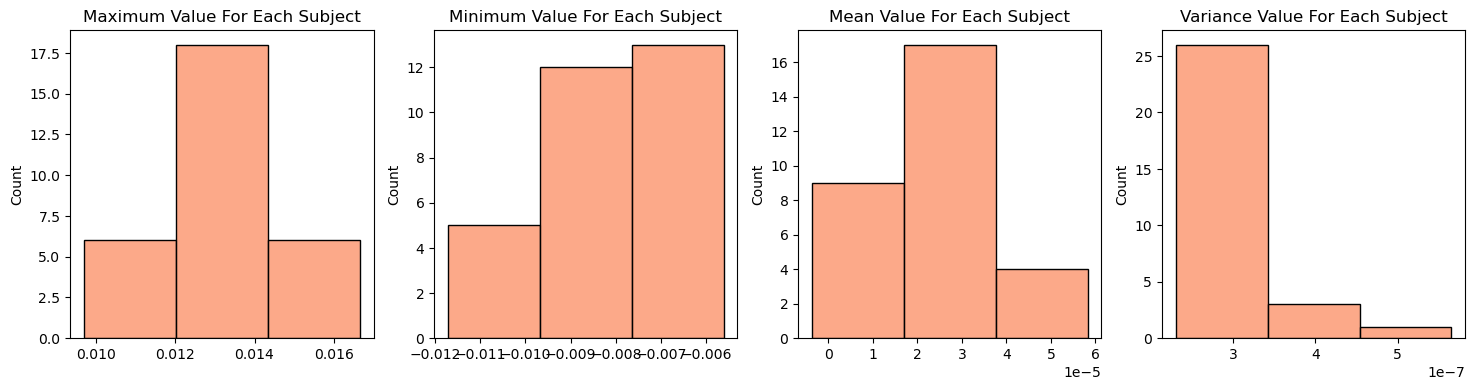

In [17]:
helper.image_report(whole_original_ICAs)

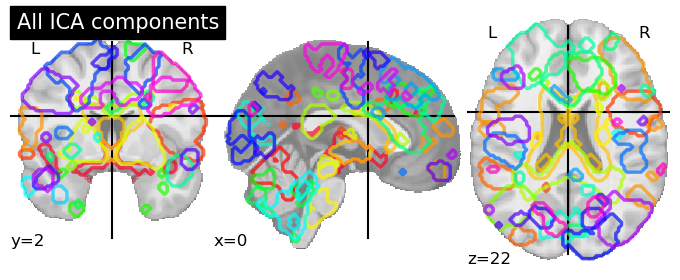

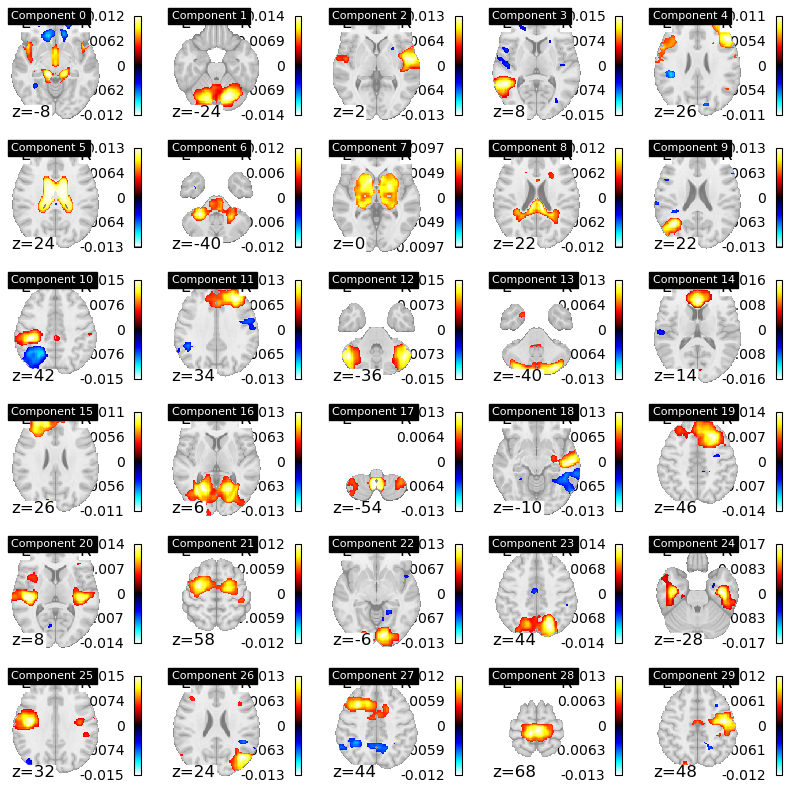

In [16]:
helper.plot_ICA_components(whole_original_ICAs)

In [30]:
importlib.reload(ica_module)

<module 'ica_module' from '/data/origami/niusha/code/local-experiment/ica_module.py'>

In [32]:
extracted_PD= ica_module.apply_masker(whole_original_ICAs, PD_cohort, func="mean_masking")
extracted_healthy = ica_module.apply_masker(whole_original_ICAs, Healthy_cohort, func="mean_masking")

In [33]:
extracted_PD.shape

(30, 232)

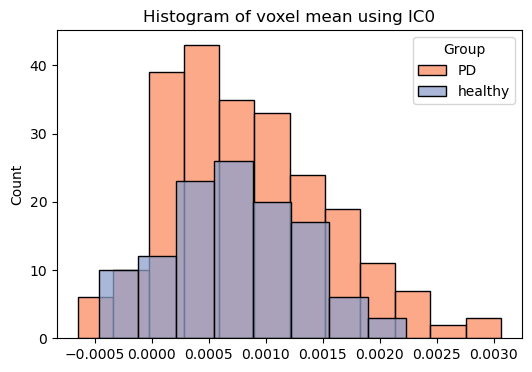

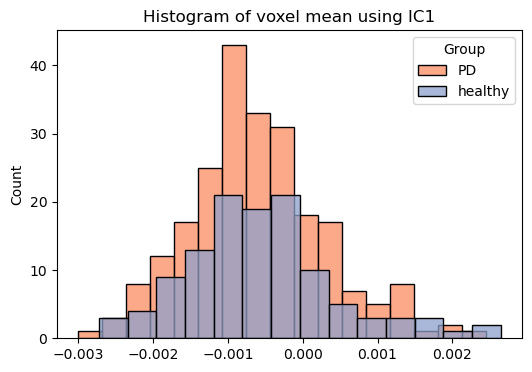

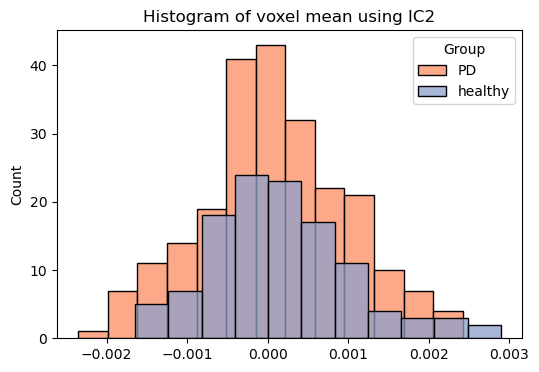

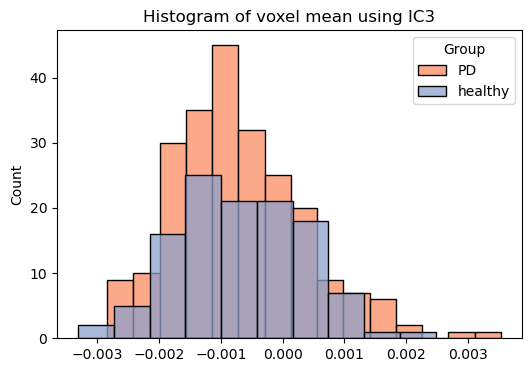

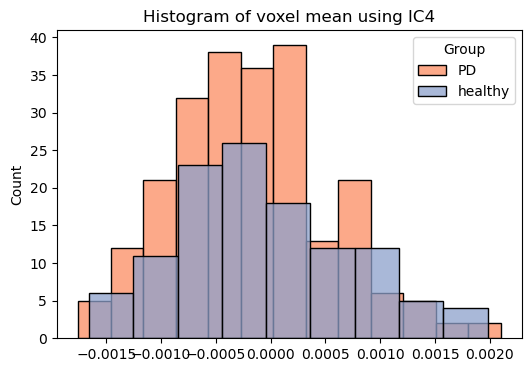

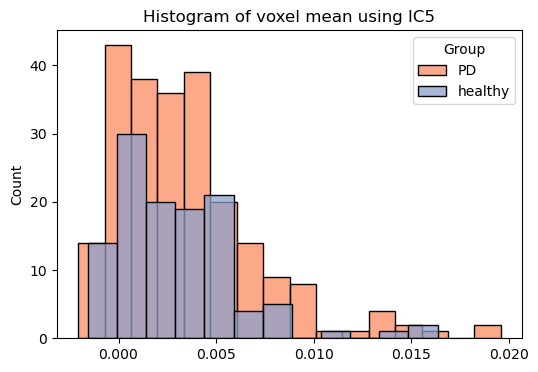

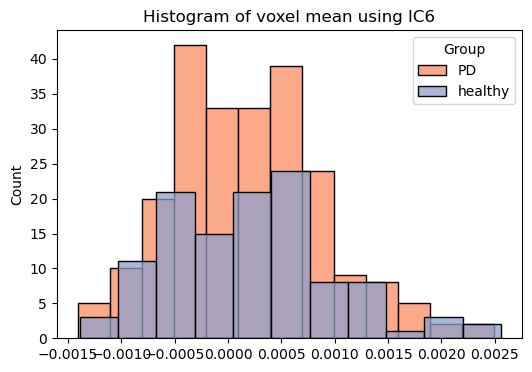

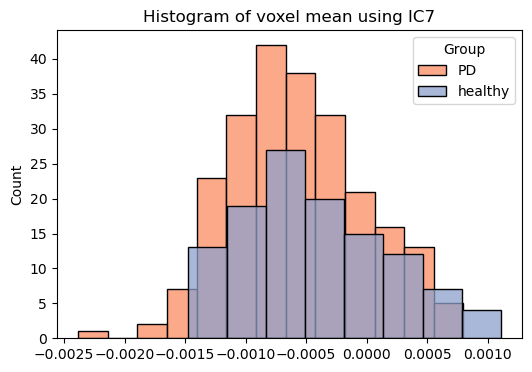

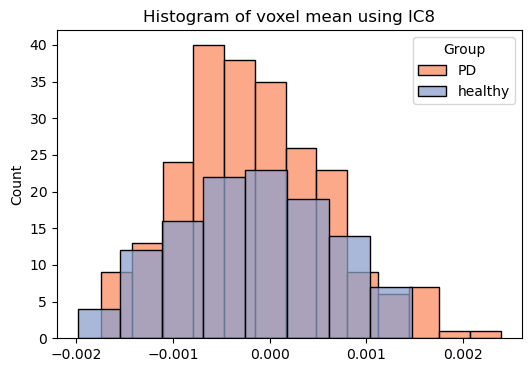

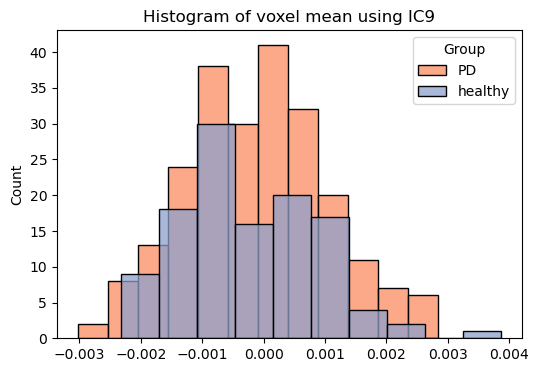

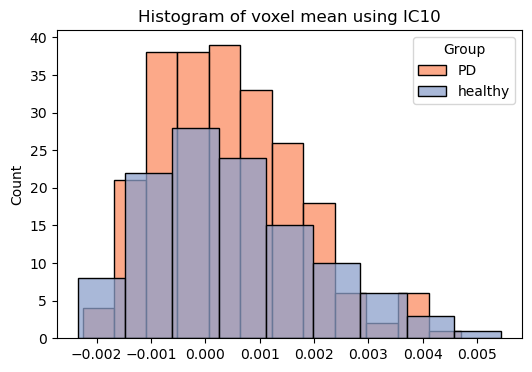

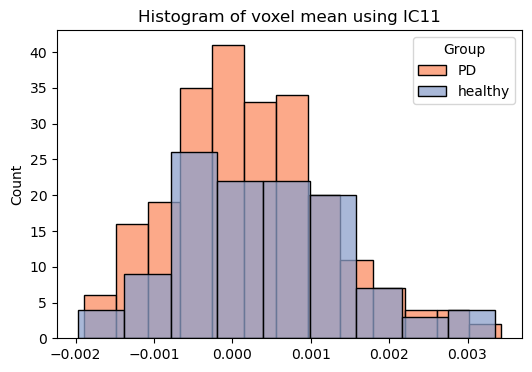

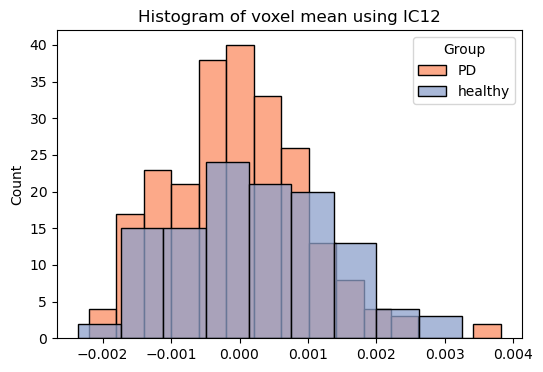

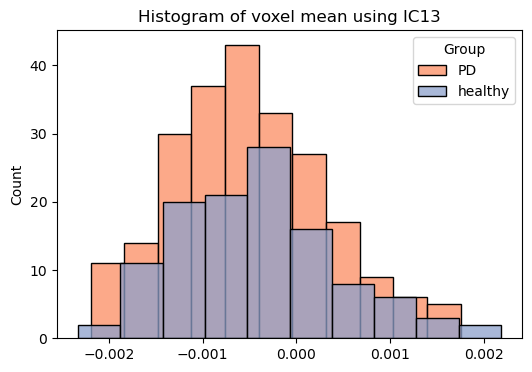

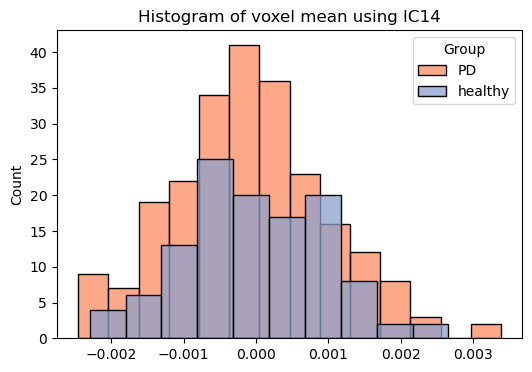

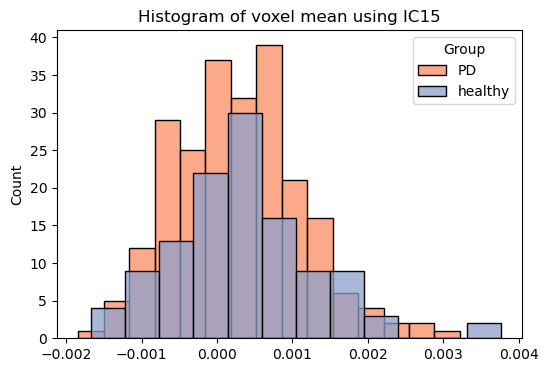

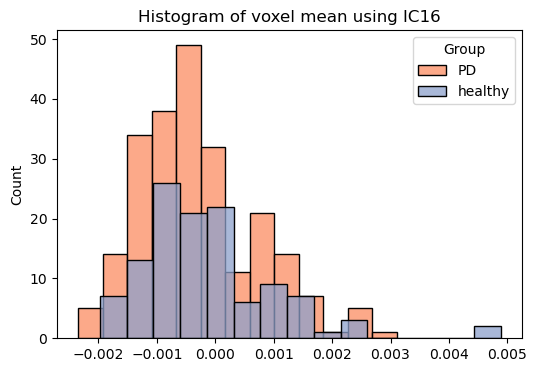

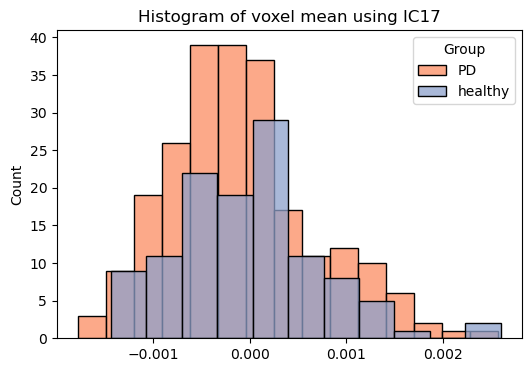

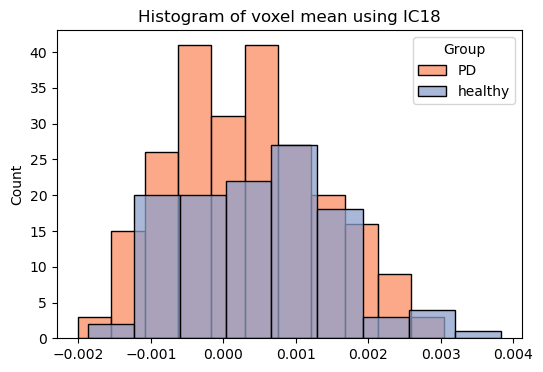

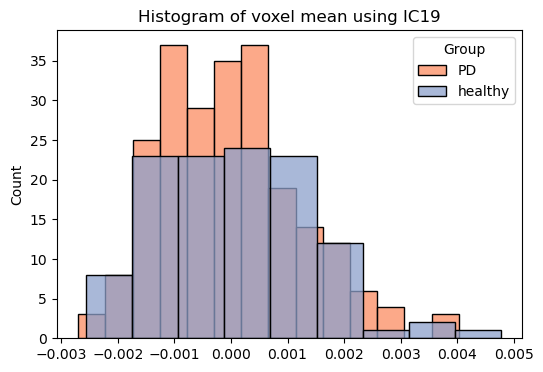

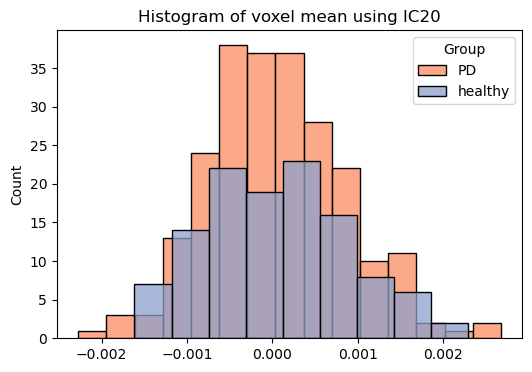

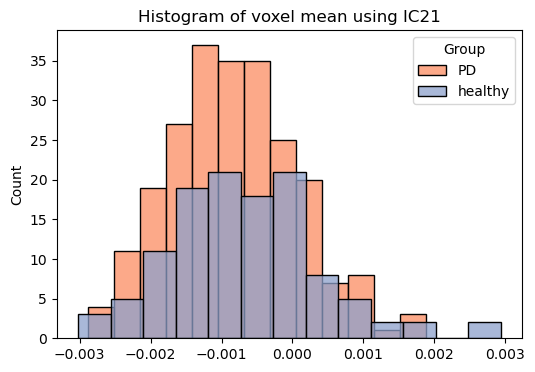

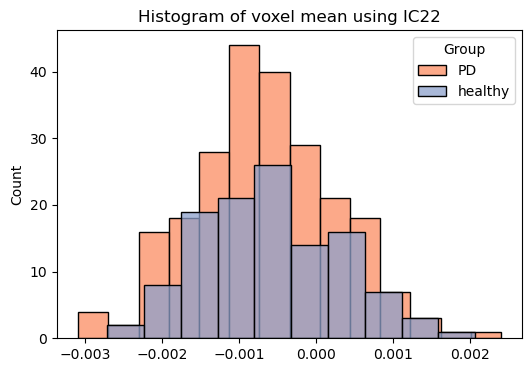

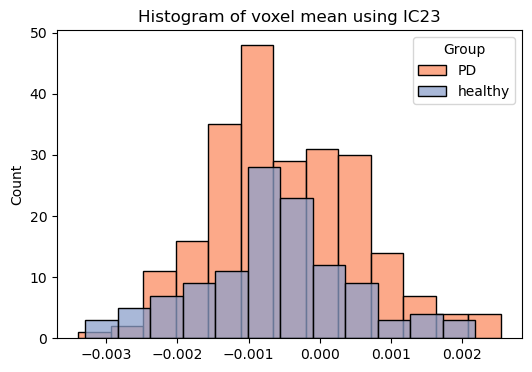

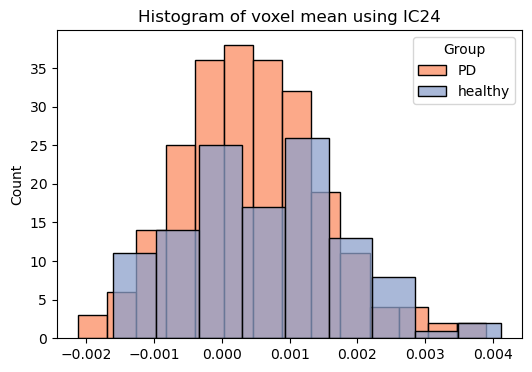

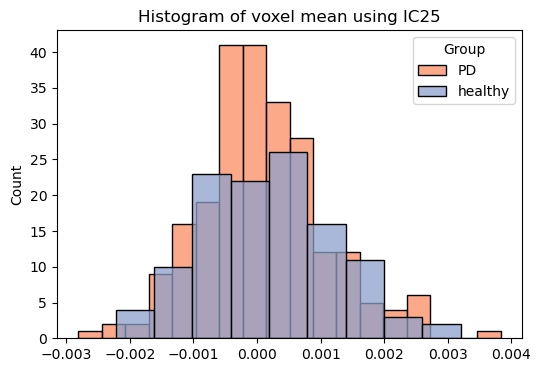

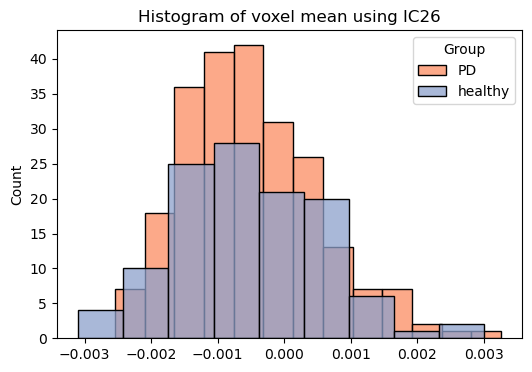

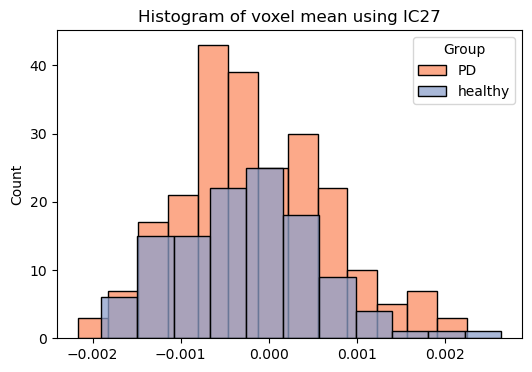

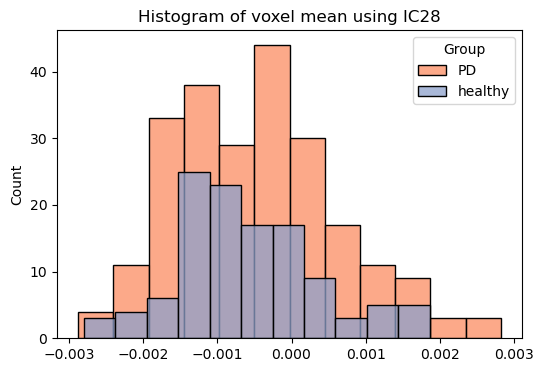

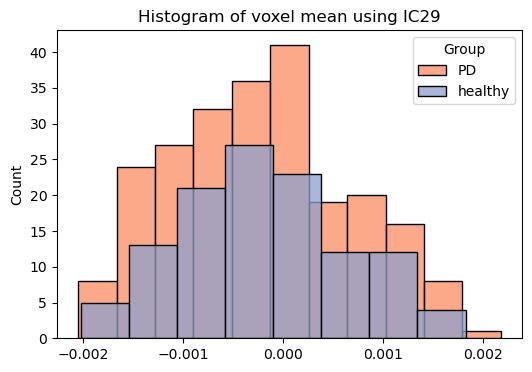

In [36]:
helper.two_array_diagrams(extracted_PD,extracted_healthy,
                        ["PD","healthy"],
                        'Histogram of voxel mean using IC')

In [37]:
extracted_PD_w = ica_module.apply_masker(whole_original_ICAs, PD_cohort, func="weighted_sum_masking")
extracted_healthy_w = ica_module.apply_masker(whole_original_ICAs, Healthy_cohort, func="weighted_sum_masking")

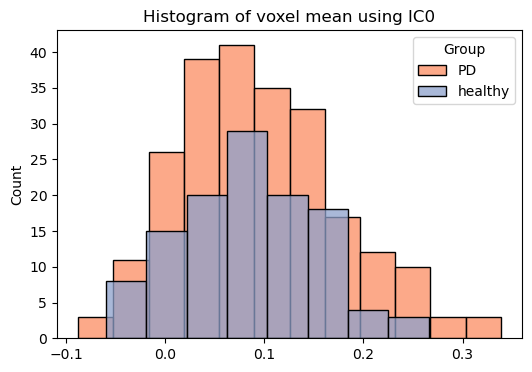

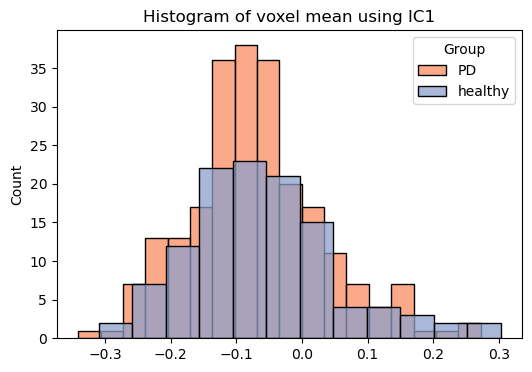

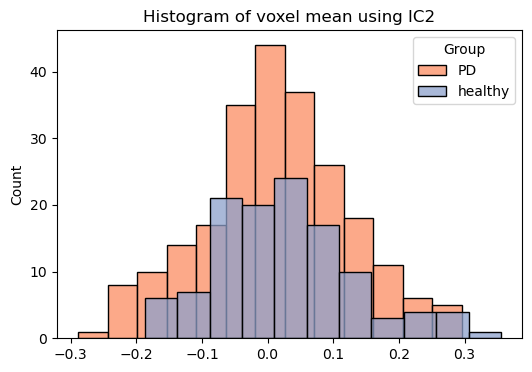

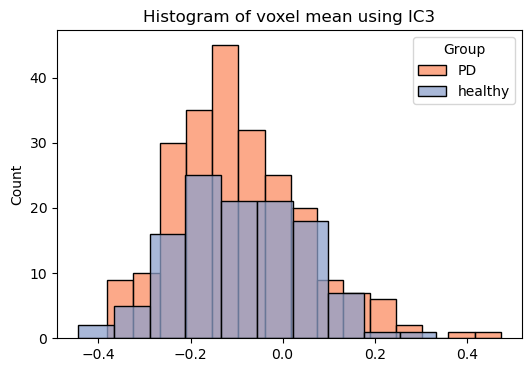

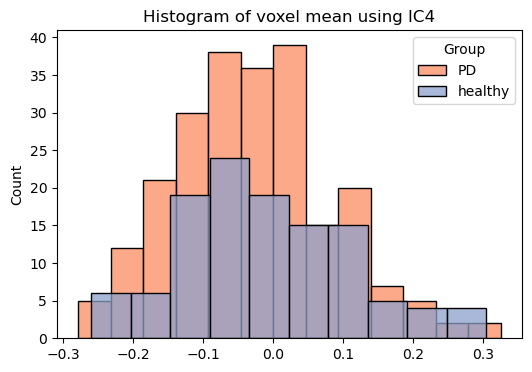

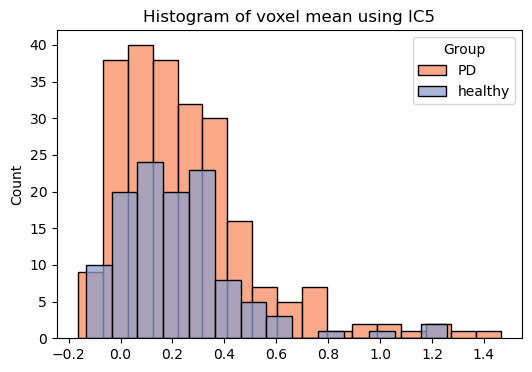

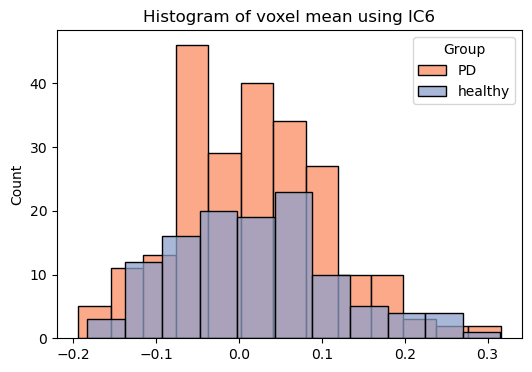

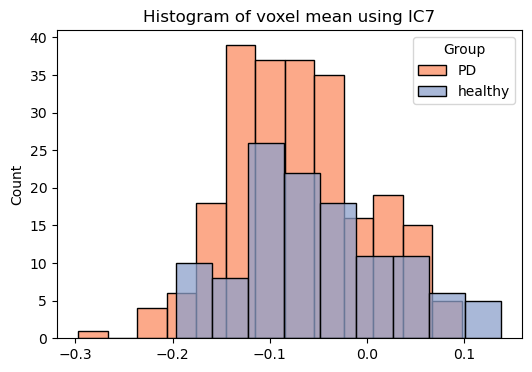

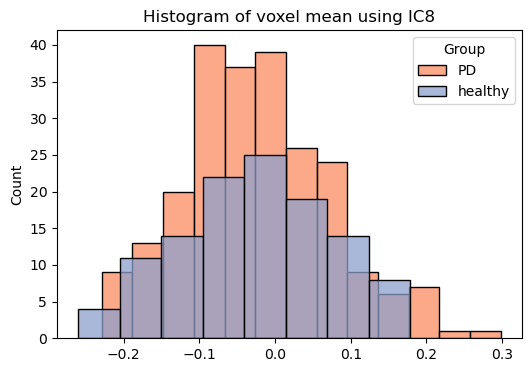

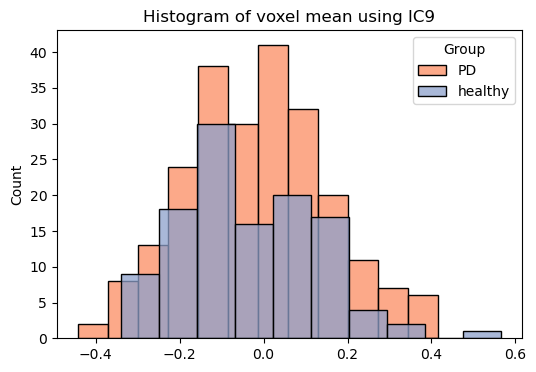

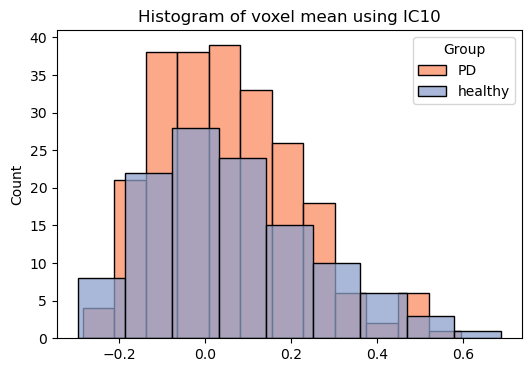

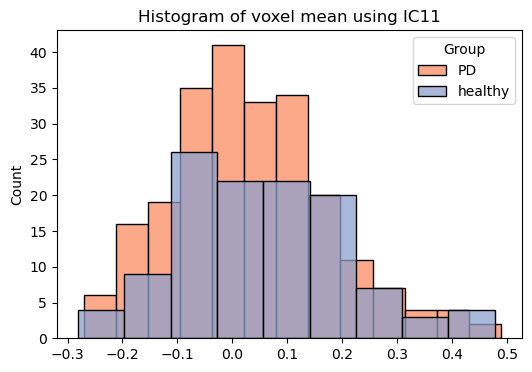

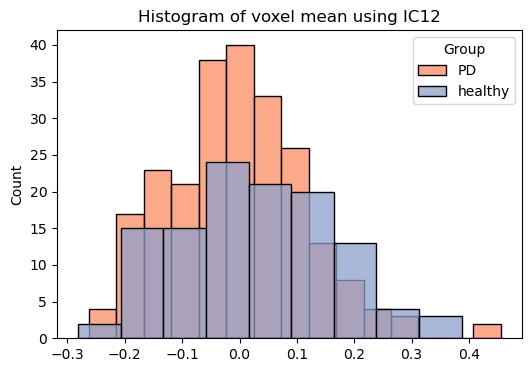

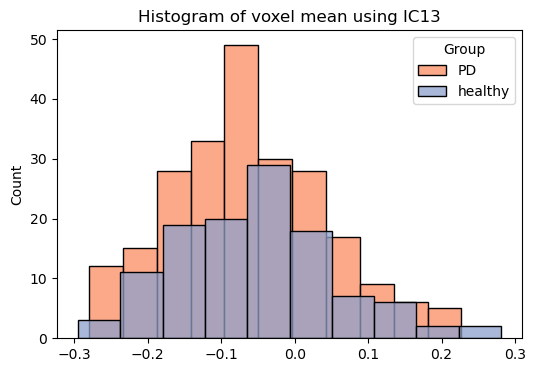

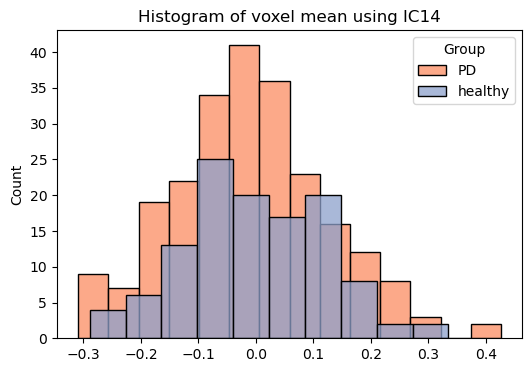

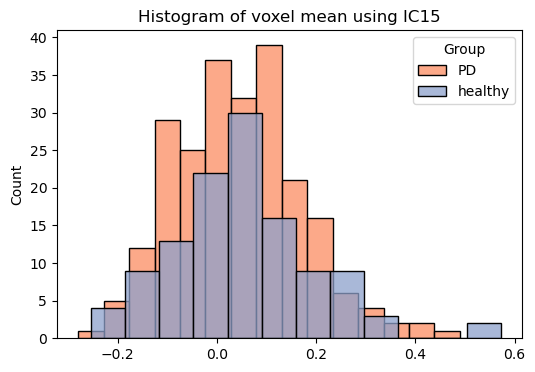

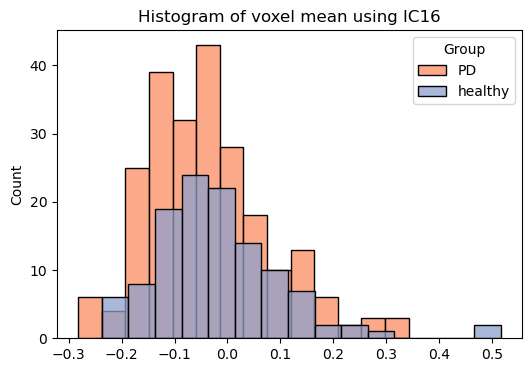

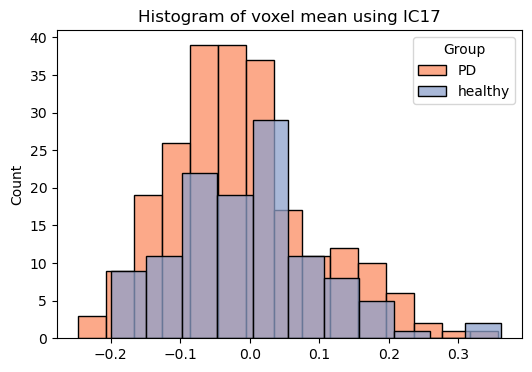

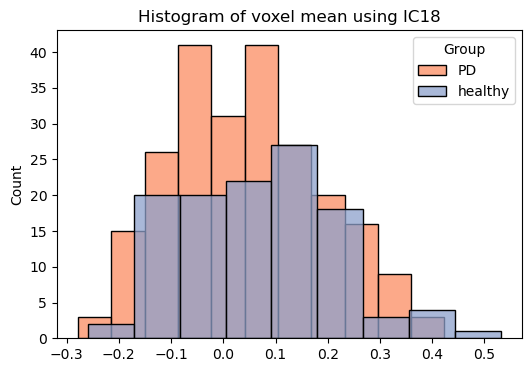

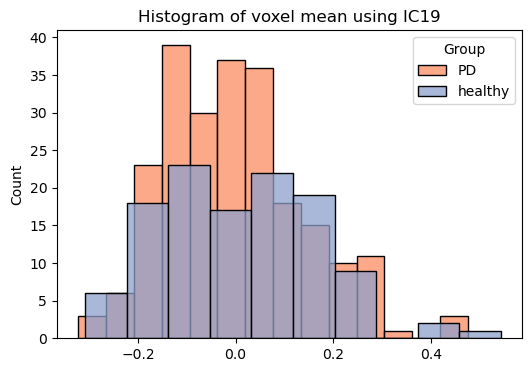

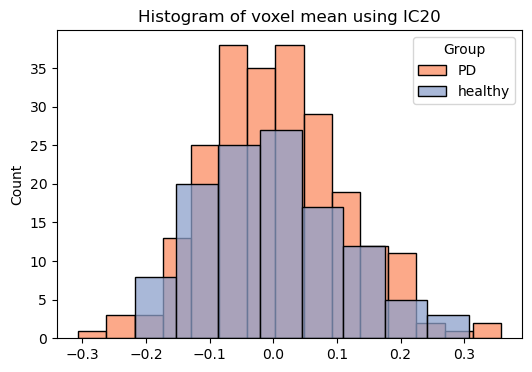

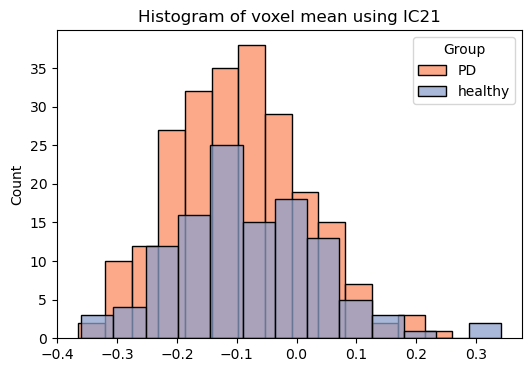

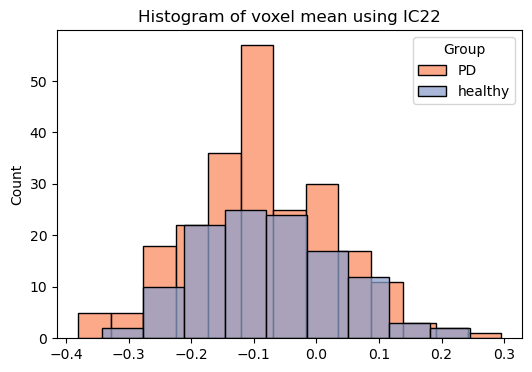

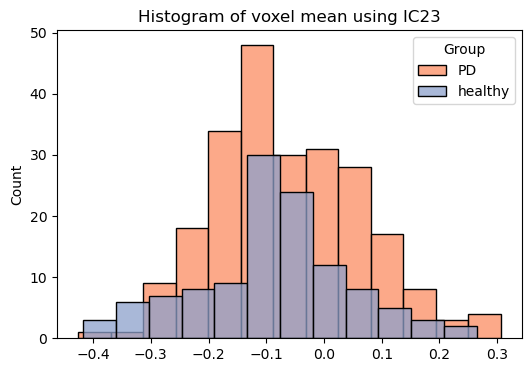

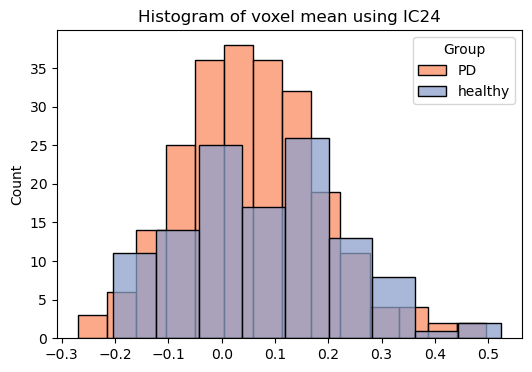

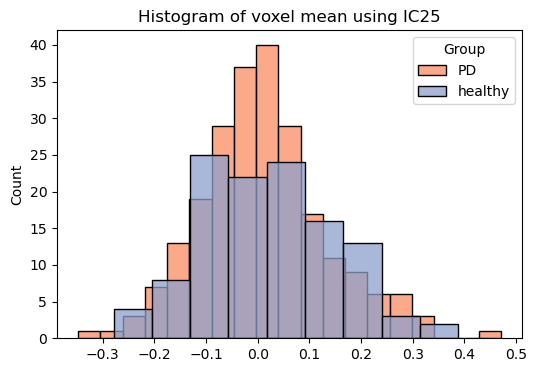

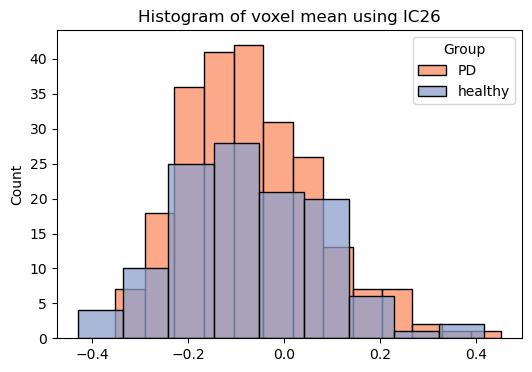

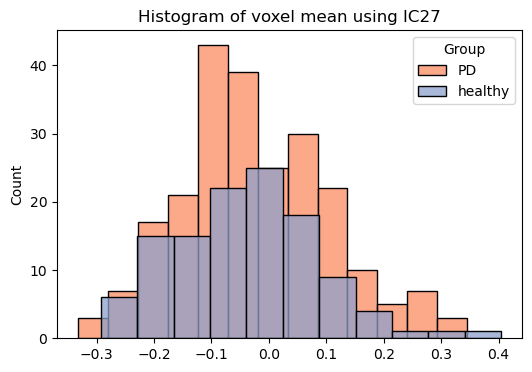

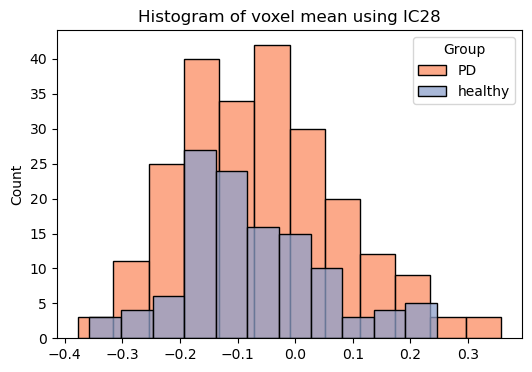

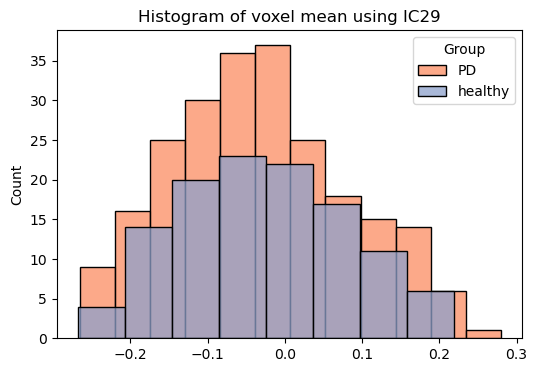

In [38]:
helper.two_array_diagrams(extracted_PD_w,extracted_healthy_w,
                        ["PD","healthy"],
                        'Histogram of voxel mean using IC')

In [5]:
FSL_ICA = load_img("/data/origami/niusha/out/ica_original_maps/melodic_IC.nii.gz")

In [6]:
FSL_extracted_PD= ica_module.apply_masker(FSL_ICA, PD_cohort, func="mean_masking")
FSL_extracted_healthy = ica_module.apply_masker(FSL_ICA, Healthy_cohort, func="mean_masking")

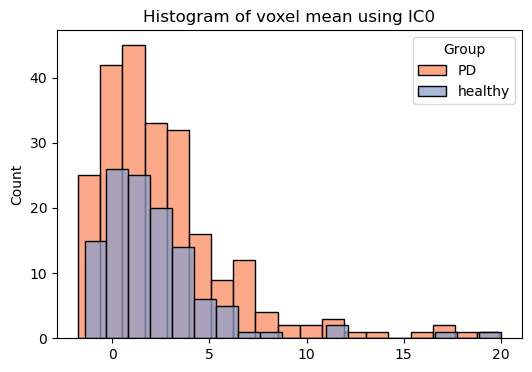

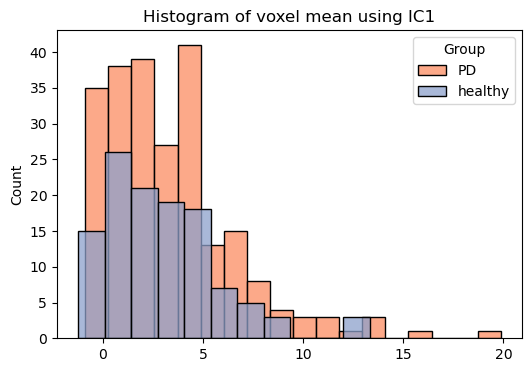

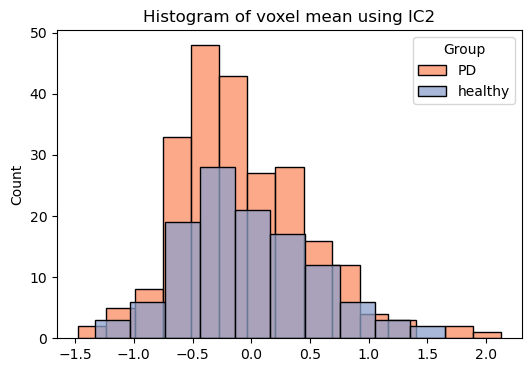

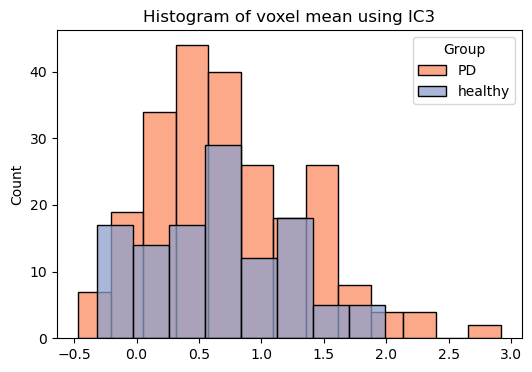

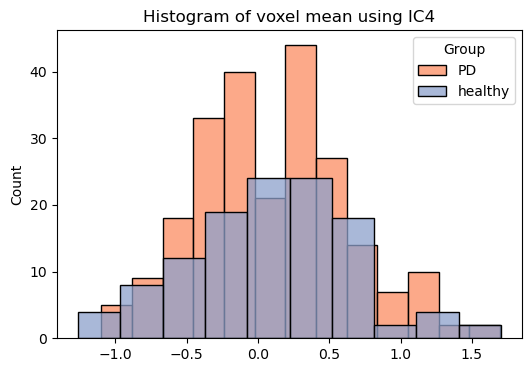

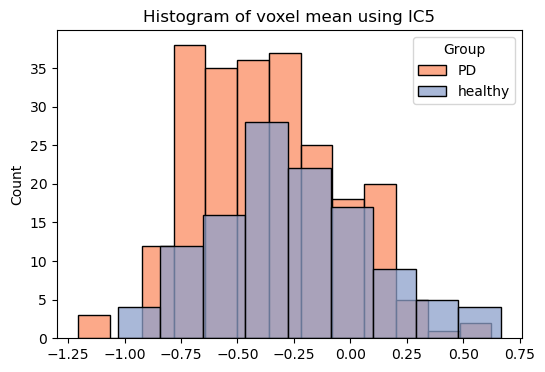

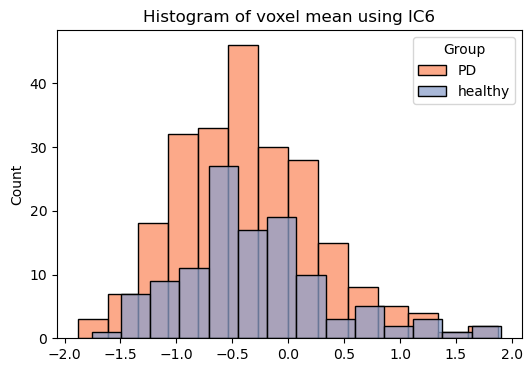

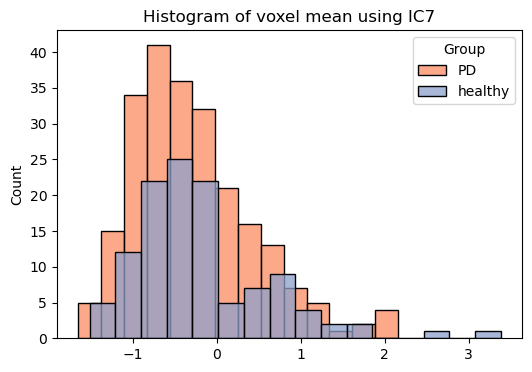

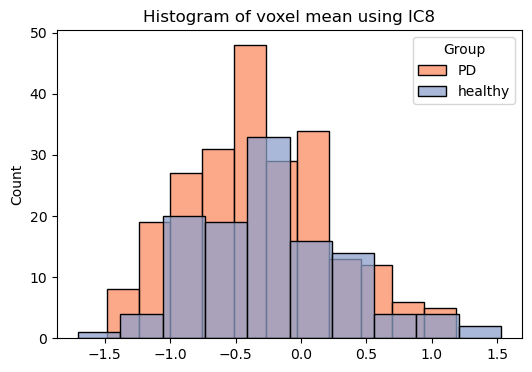

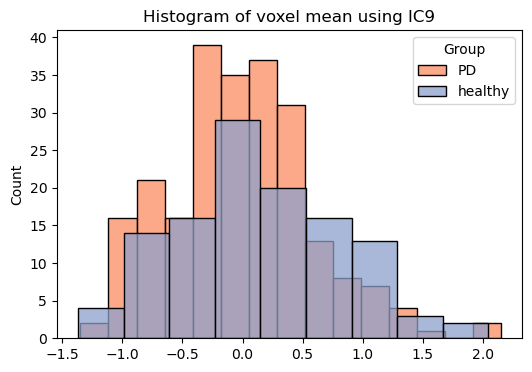

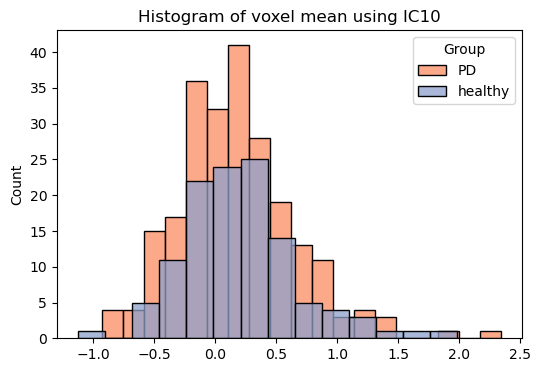

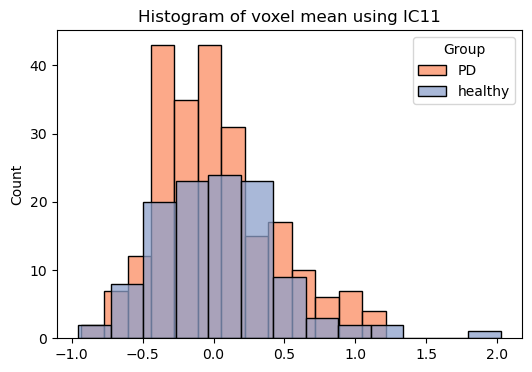

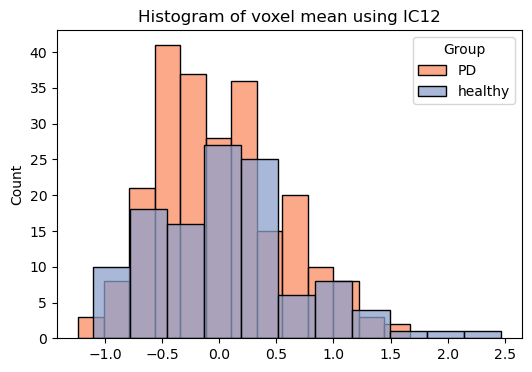

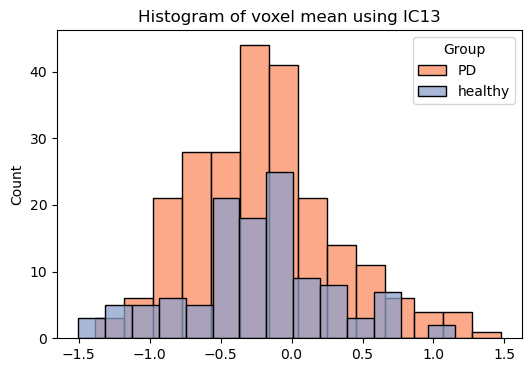

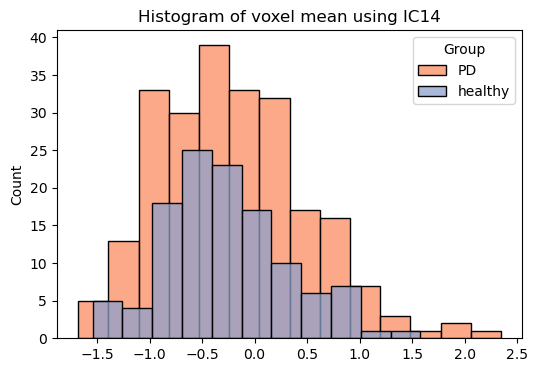

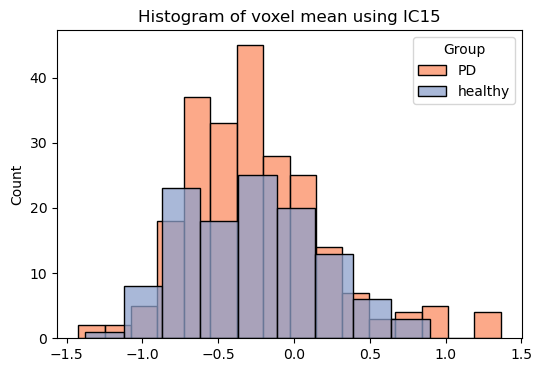

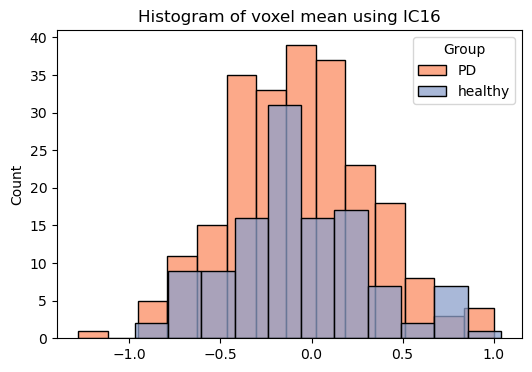

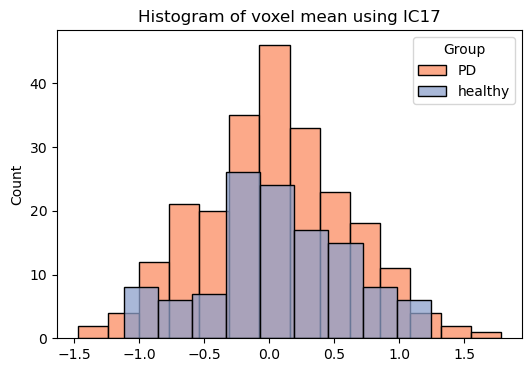

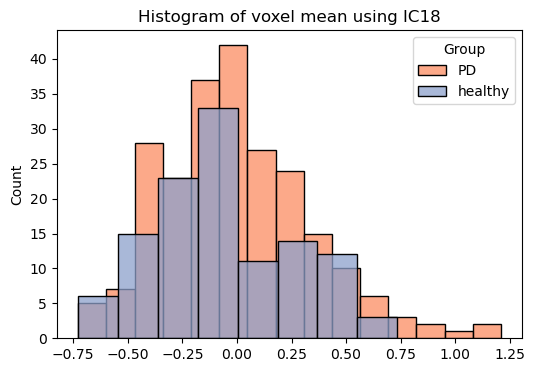

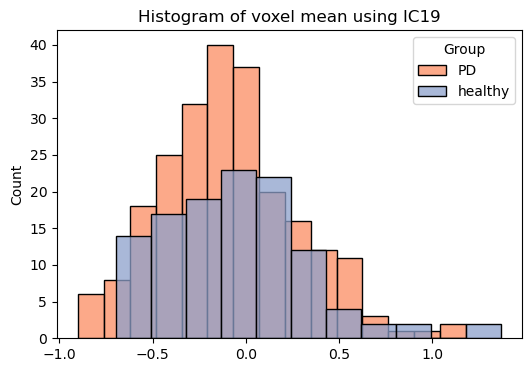

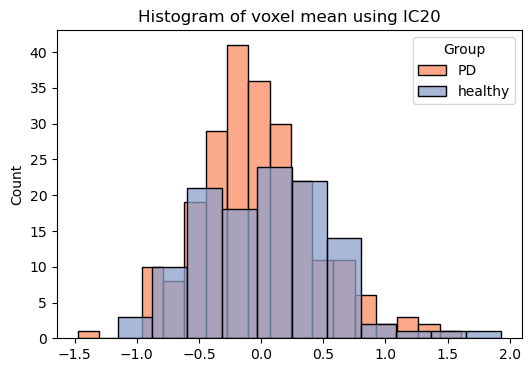

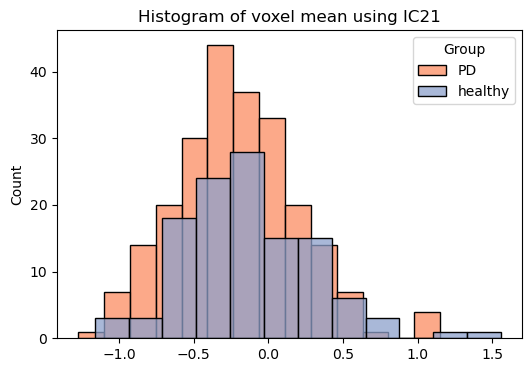

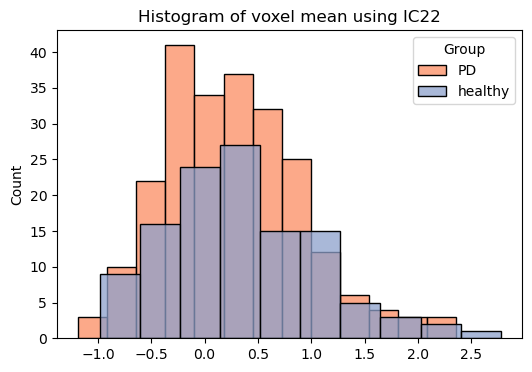

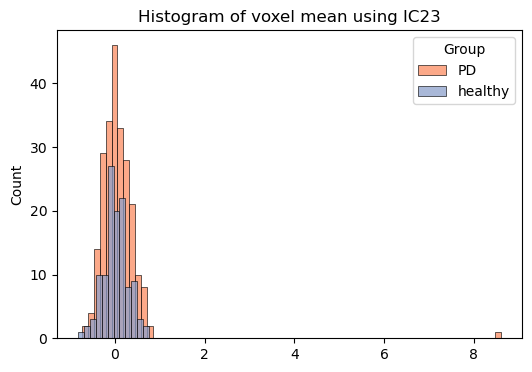

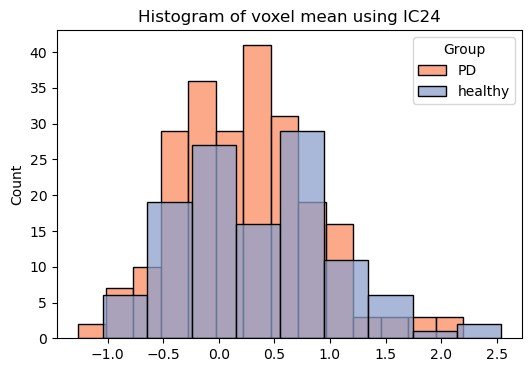

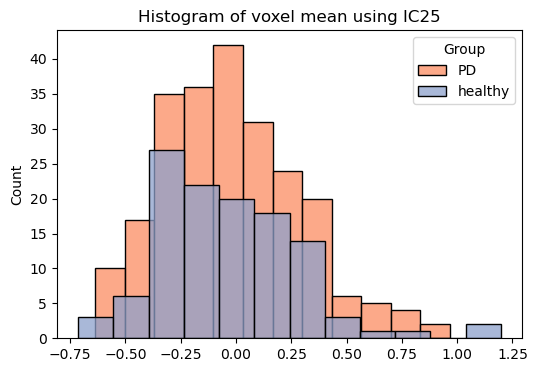

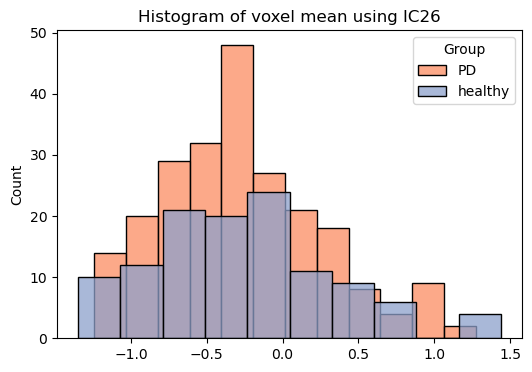

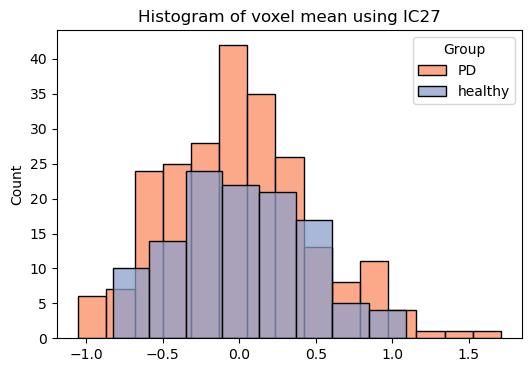

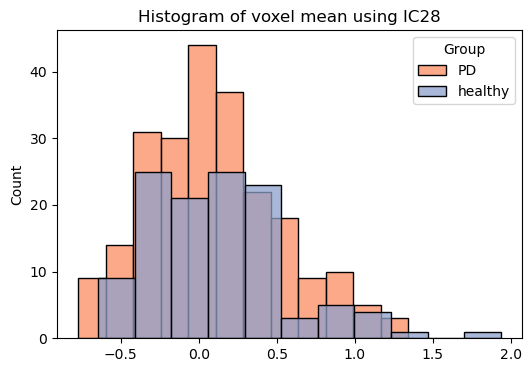

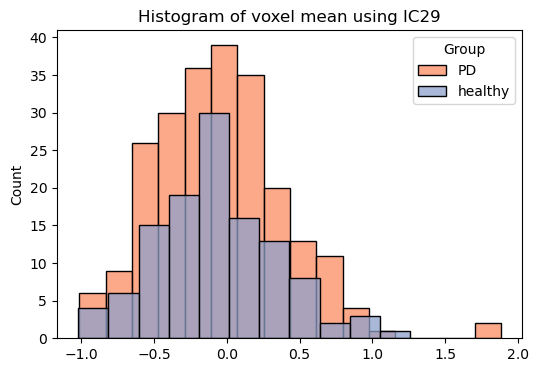

In [8]:
helper.two_array_diagrams(FSL_extracted_PD, FSL_extracted_healthy,
                          ["PD","healthy"],'Histogram of voxel mean using IC')

In [9]:
FSL_extracted_PD_w = ica_module.apply_masker(FSL_ICA, PD_cohort, func="weighted_sum_masking")
FSL_extracted_healthy_w = ica_module.apply_masker(FSL_ICA, Healthy_cohort, func="weighted_sum_masking")

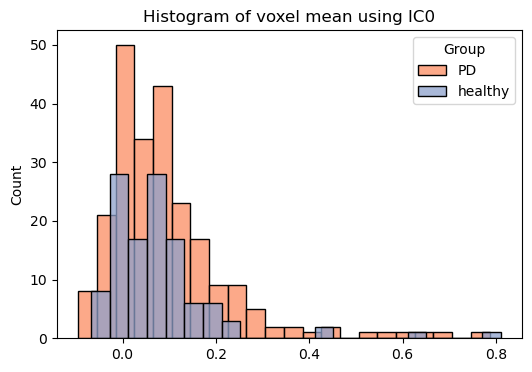

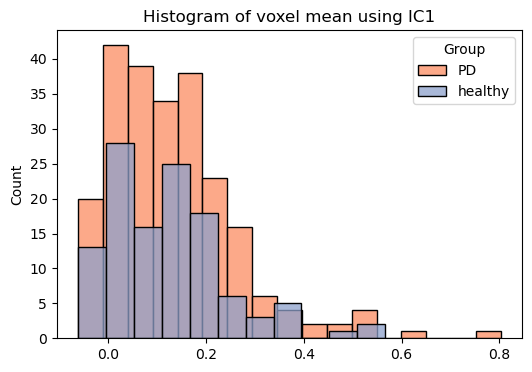

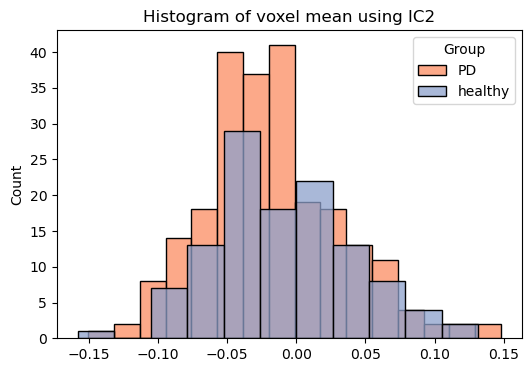

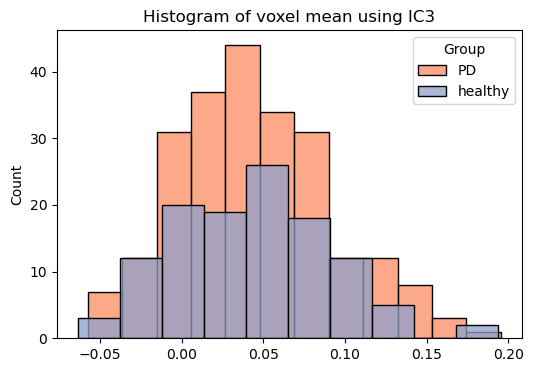

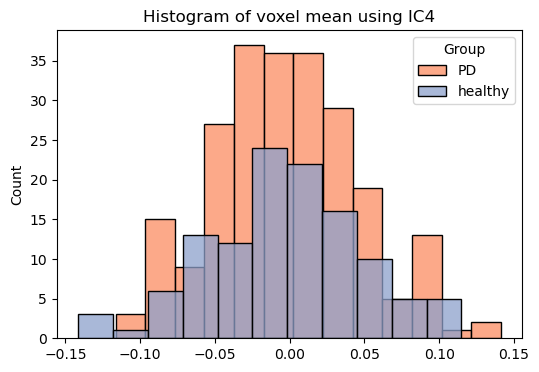

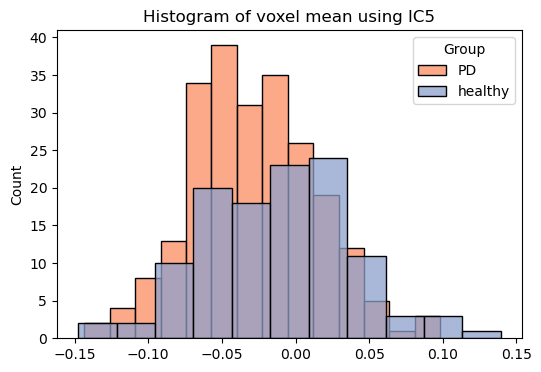

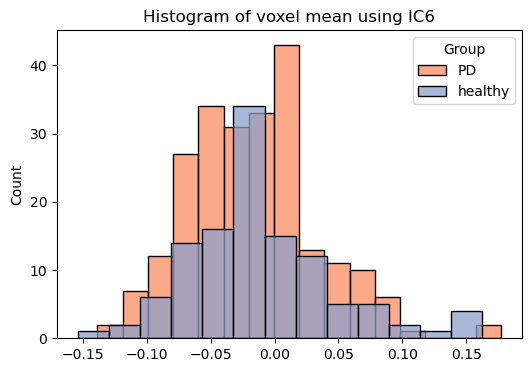

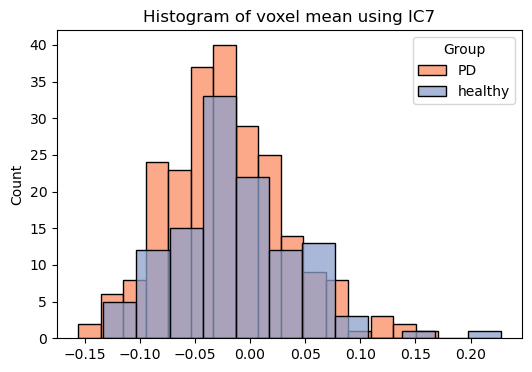

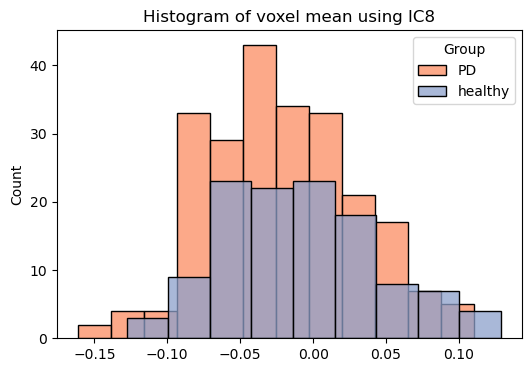

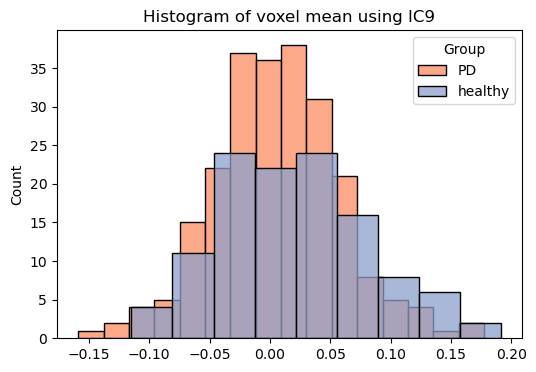

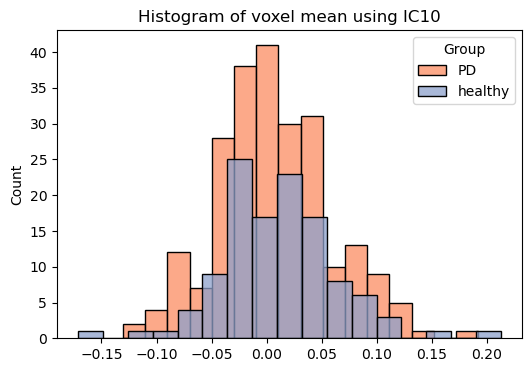

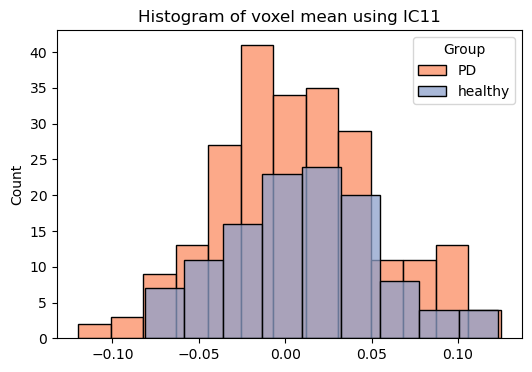

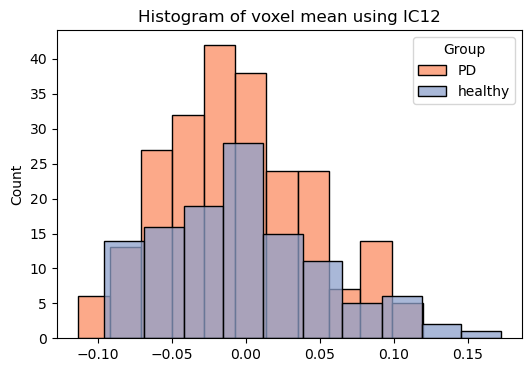

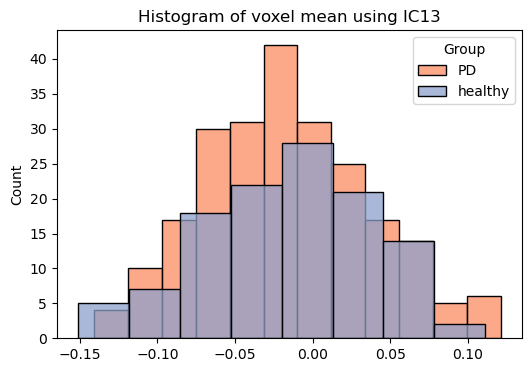

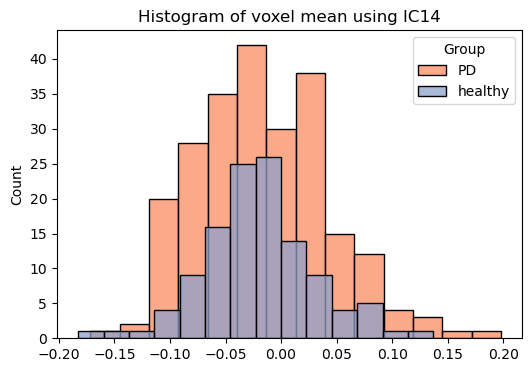

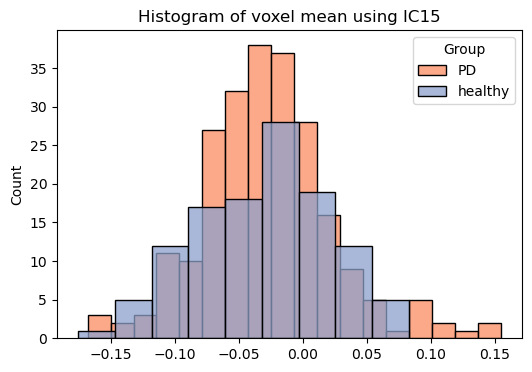

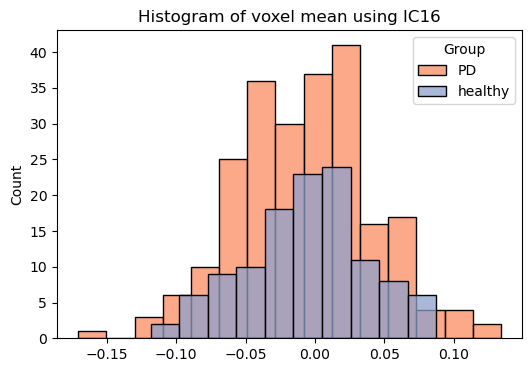

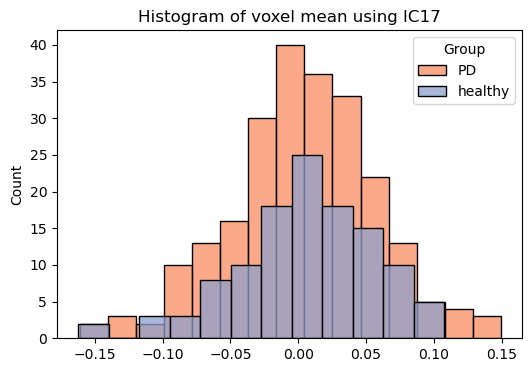

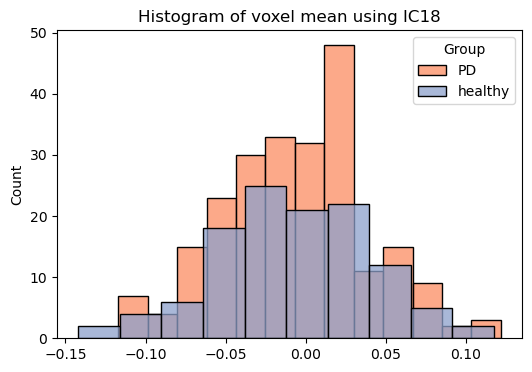

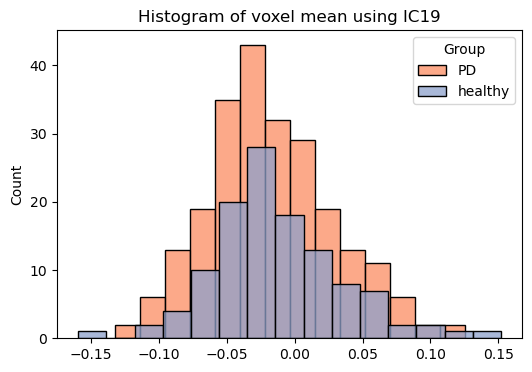

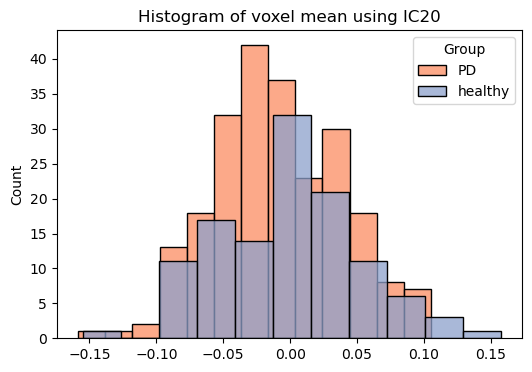

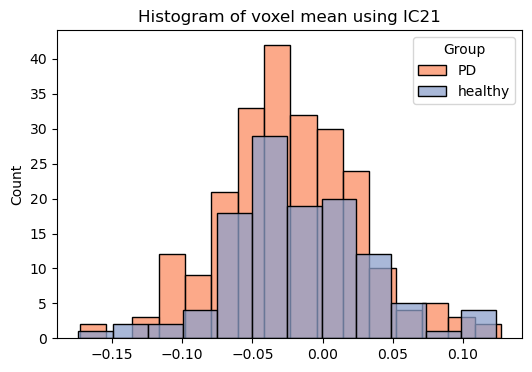

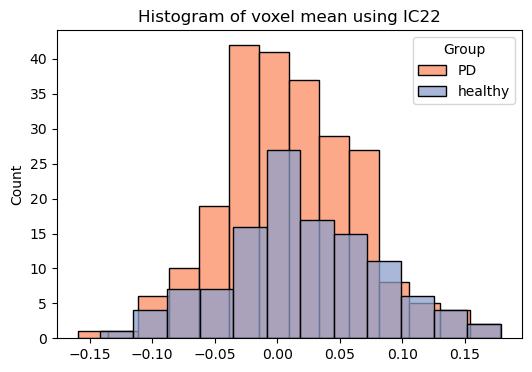

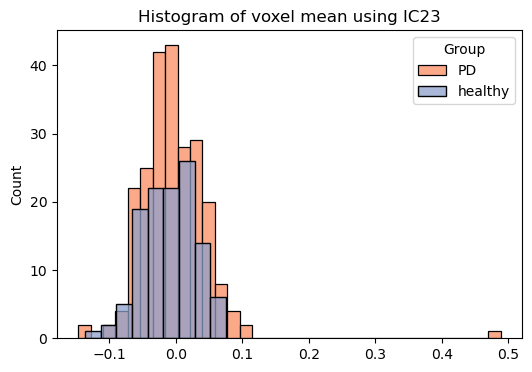

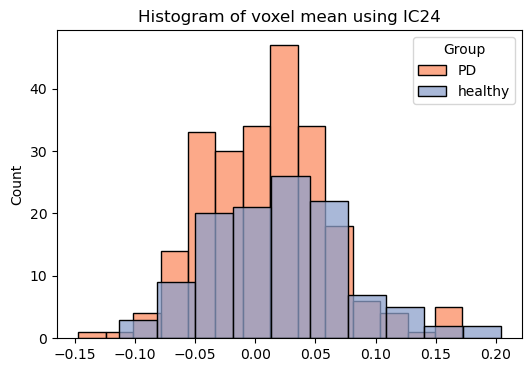

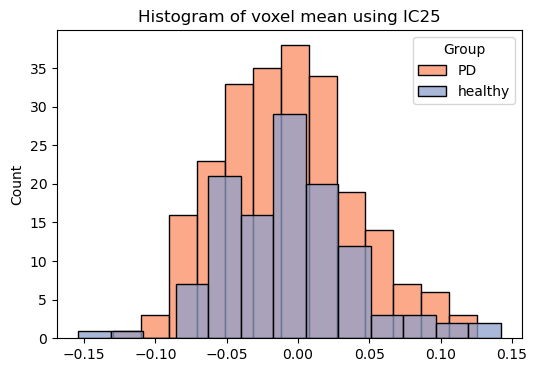

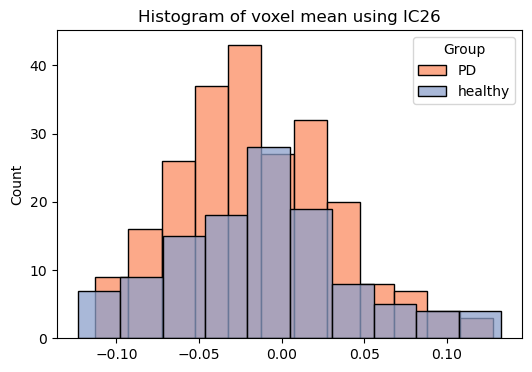

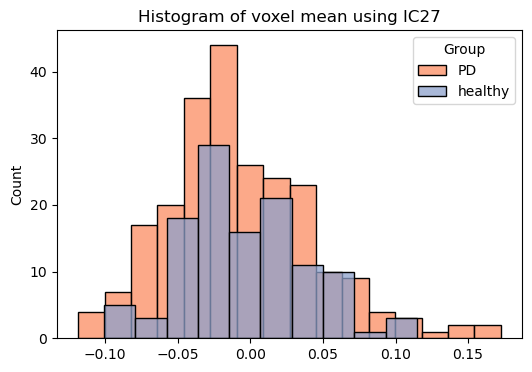

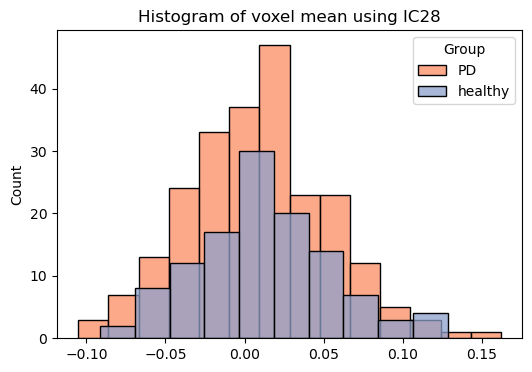

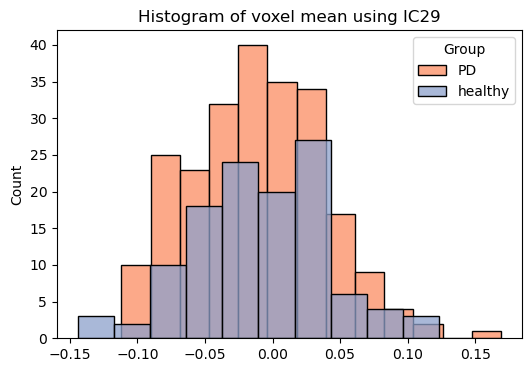

In [10]:
helper.two_array_diagrams(FSL_extracted_PD_w, FSL_extracted_healthy_w,
                          ["PD","healthy"],'Histogram of voxel mean using IC')